# Page View Time Series Visualizer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
np.float = float

In [2]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/refs/heads/main/fcc-forum-pageviews.csv

--2025-01-18 05:11:18--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/refs/heads/main/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0s      

2025-01-18 05:11:18 (62.2 MB/s) - ‘fcc-forum-pageviews.csv’ saved [22381/22381]



In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
# Clean data (Filter out days when page views are in the top 2.5% or bottom 2.5%)
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


line_plot.png


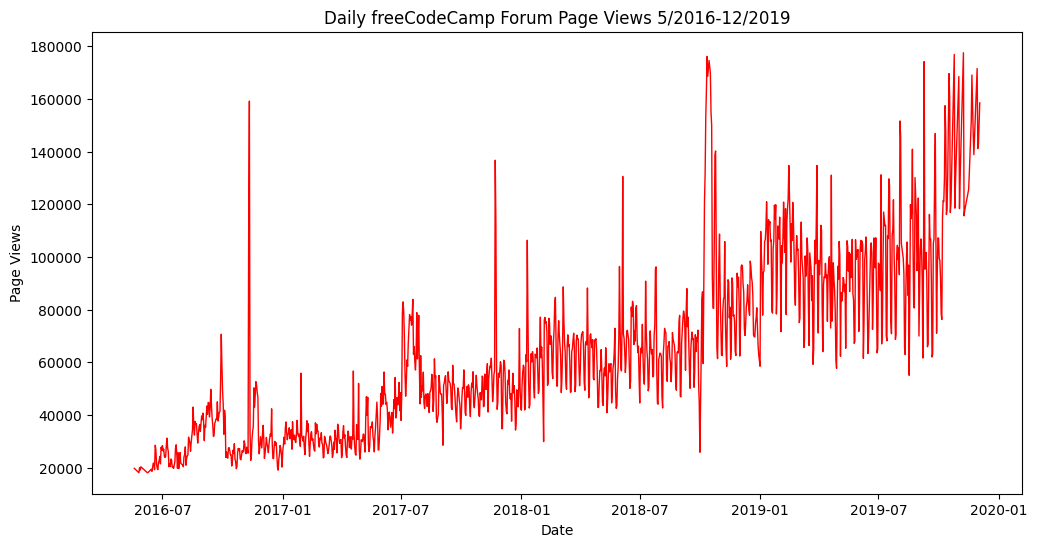

In [5]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df["value"], color="red", linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return fig
    fig.savefig('line_plot.png')
    return fig

# Execute draw line plot function
line_plot_fig = draw_line_plot()
print('line_plot.png')

bar_plot.png


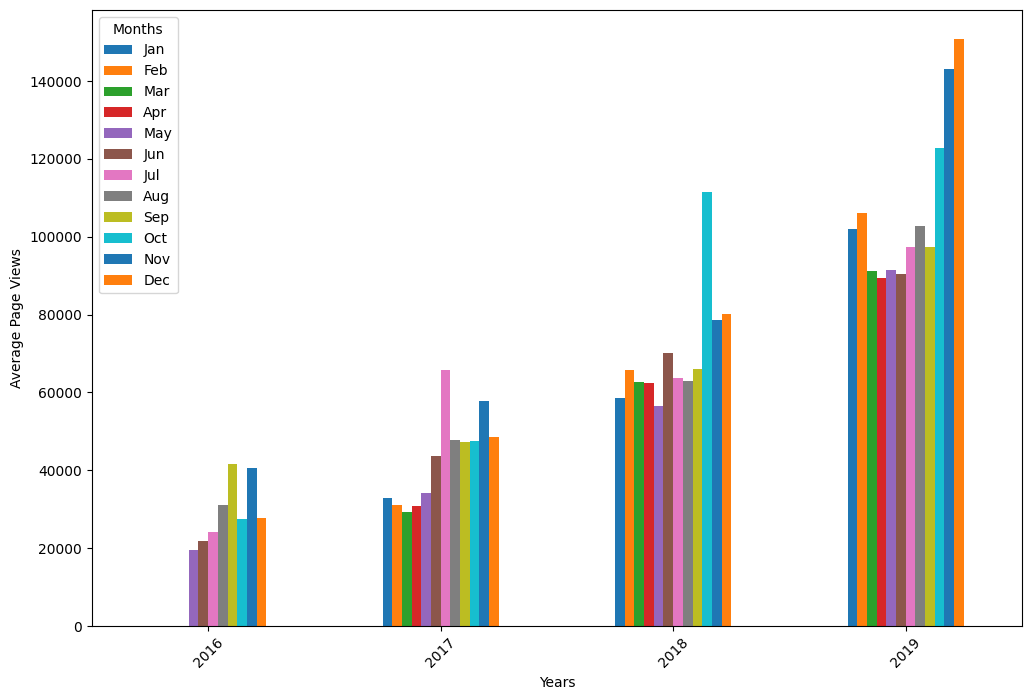

In [6]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month
    df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    # Draw bar plot
    fig = df_bar.plot(kind="bar", figsize=(12, 8), legend=True).get_figure()
    plt.title(None)
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months", labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.xticks(rotation=45)

    # Save image and return fig
    fig.savefig('bar_plot.png')
    return fig

# Execute draw bar plot function
bar_plot_fig = draw_bar_plot()
print('bar_plot.png')

box_plot.png


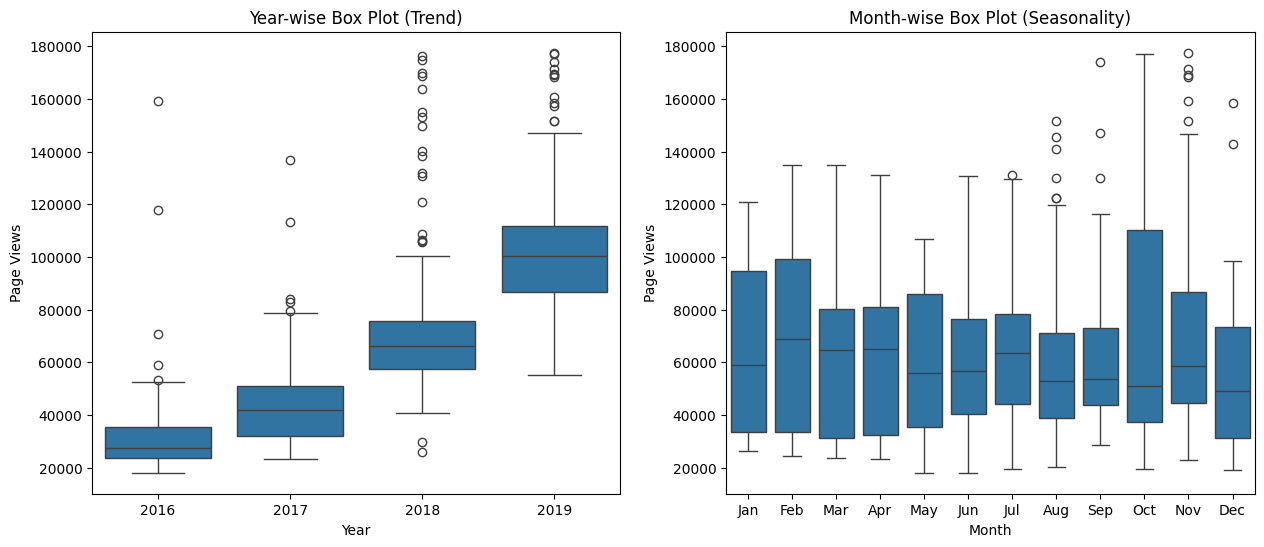

In [7]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(ax=axes[0], x="year", y="value", data=df_box)
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(ax=axes[1], x="month", y="value", data=df_box, order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

# Execute draw box plot function
box_plot_fig = draw_box_plot()
print('box_plot.png')